##This is Part 1 of the entire project on BERT and BART summarisation
Find the links for all other parts :

1. https://colab.research.google.com/drive/1_zOMTDQI17urkvz0Orgik25B-SHyE2R3?
2. https://colab.research.google.com/drive/1_do1VljVplbwfi-oTeoCW_6JCYebVS4a?
3. https://colab.research.google.com/drive/1JUYNBbG0mg6UeLM-zbyDmTZYIvcSZibq?

<a href="https://www.linkedin.com/in/tushar-moitra-704469245/">LinkedIn</a>
<a href="https://github.com/tacheboy09">GitHub</a>

In [ ]:
!pip3 install -q transformers datasets rouge-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
#install spacy large language model. (Colab needs to be restarted/)
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 861.5 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install spacy
!pip install tqdm

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_lg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CNN/Daily Mail Dataset

From Hugging Face Datasets

In [ ]:
!pip install --upgrade pyarrow

In [ ]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0", split="test")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
dataset

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 11490
})

Mount Google Drive

# Data Visualisation

In [ ]:
cnn_df = pd.DataFrame(dataset)
cnn_df["summary"] = cnn_df.highlights.apply(lambda x: "".join(x.split("\n")))
cnn_df["art_sents"] = cnn_df.article.apply(lambda x: len([x for x in nlp(x).sents]))
cnn_df

,article,highlights,id,summary,art_sents
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01,Membership gives the ICC jurisdiction over all...,27
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef,"Theia, a bully breed mix, was apparently hit b...",19
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69,Mohammad Javad Zarif has spent more time with ...,38
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca,17 Americans were exposed to the Ebola virus w...,11
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f,Student is no longer on Duke University campus...,22
...,...,...,...,...,...
11485,Telecom watchdogs are to stop a rip-off that a...,Operators are charging up to 20p a minute - ev...,0ac776a4dc09ca97c136f4314fed4defb48a361a,Operators are charging up to 20p a minute - ev...,27
11486,The chilling reenactment of how executions are...,Bali Nine ringleaders will face the firing squ...,fe89a6a2e28d173e5ad4c6d814c15b95aa969e3f,Bali Nine ringleaders will face the firing squ...,83
11487,It is a week which has seen him in deep water ...,Hardy was convicted of domestic abuse against ...,ded2f535cd6ab95d11b5f4ea29bbf2b2d3c55c50,Hardy was convicted of domestic abuse against ...,32
11488,"Despite the hype surrounding its first watch, ...",Apple sold more than 61 million iPhones in the...,30ec5f280eee772a73d181bfc8514defd8026434,Apple sold more than 61 million iPhones in the...,46


In [ ]:
cnn_df['sents']=cnn_df['art_sents']
del cnn_df['art_sents']
cnn_df

,article,highlights,id,summary,sents
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01,Membership gives the ICC jurisdiction over all...,27
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef,"Theia, a bully breed mix, was apparently hit b...",19
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69,Mohammad Javad Zarif has spent more time with ...,38
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca,17 Americans were exposed to the Ebola virus w...,11
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f,Student is no longer on Duke University campus...,22
...,...,...,...,...,...
11485,Telecom watchdogs are to stop a rip-off that a...,Operators are charging up to 20p a minute - ev...,0ac776a4dc09ca97c136f4314fed4defb48a361a,Operators are charging up to 20p a minute - ev...,27
11486,The chilling reenactment of how executions are...,Bali Nine ringleaders will face the firing squ...,fe89a6a2e28d173e5ad4c6d814c15b95aa969e3f,Bali Nine ringleaders will face the firing squ...,83
11487,It is a week which has seen him in deep water ...,Hardy was convicted of domestic abuse against ...,ded2f535cd6ab95d11b5f4ea29bbf2b2d3c55c50,Hardy was convicted of domestic abuse against ...,32
11488,"Despite the hype surrounding its first watch, ...",Apple sold more than 61 million iPhones in the...,30ec5f280eee772a73d181bfc8514defd8026434,Apple sold more than 61 million iPhones in the...,46


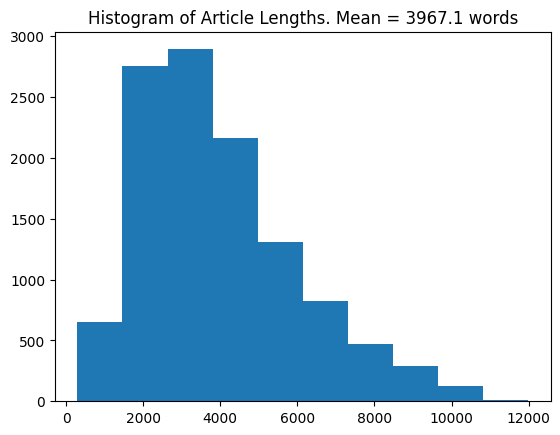

In [ ]:
art_lengths = [ len(x) for x in cnn_df.article]
plt.hist(art_lengths);
plt.title("Histogram of Article Lengths. Mean = " + str(round(sum(art_lengths)/ len(art_lengths),1)) + " words" );

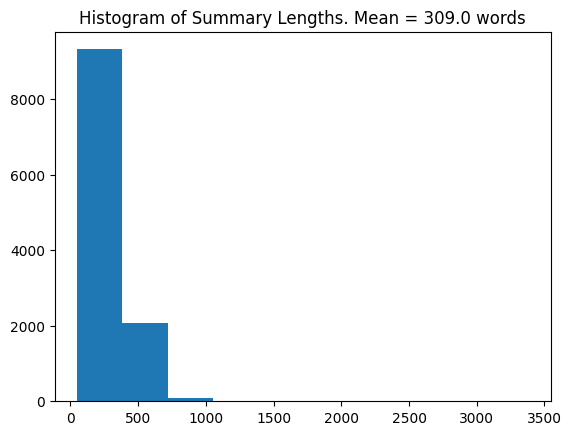

In [ ]:
sum_lengths = [ len(x) for x in cnn_df.summary]
plt.hist(sum_lengths);
plt.title("Histogram of Summary Lengths. Mean = " + str(round(sum(sum_lengths)/ len(sum_lengths),1)) + " words" );

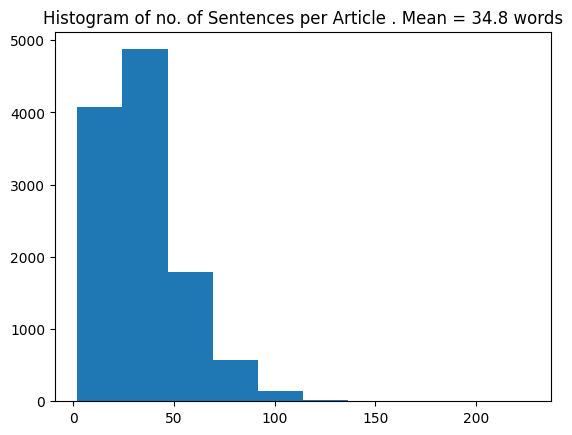

In [ ]:
# art_lengths = [ len(x) for x in cnn_df.article]
plt.hist(cnn_df.sents);
plt.title("Histogram of no. of Sentences per Article . Mean = " + str(round(sum(cnn_df.sents)/ len(cnn_df.sents),1)) + " words" );

## Export Data Subset for Reuse

- We will write the test and train datasets to disc to avoid new downloads each time we reuse them in subsequent notebooks.

In [ ]:
import os

In [ ]:
test_df =  pd.DataFrame(load_dataset("cnn_dailymail", "3.0.0", split="test"))
train_df = pd.DataFrame(load_dataset("cnn_dailymail", "3.0.0", split="train"))

test_df.shape, train_df.shape

((11490, 3), (287113, 3))

In [ ]:
os.makedirs("drive/MyDrive/data/", exist_ok=True)
os.makedirs("drive/MyDrive/data/test", exist_ok=True)
os.makedirs("drive/MyDrive/data/train", exist_ok=True)

test_df.to_json("drive/MyDrive/data/test/test.json")
train_df.to_json("drive/MyDrive/data/train/train.json")

## Data Preprocessing - Extacting Sentences with Spacy


For each article, we extract sentences with Spacy
- construct "sentence" dictionary and "document" dictionary

In [ ]:
# to get jsons
# dont know if they will be be used explicitly used.
def get_dicts(df, folder="test"):
  sents_dict = {}
  doc_dict = {i: {"article": df.article[i], "highlight": df.highlights[i]} for i in df.index}
  raw_docs = [ doc_dict[k]["article"] for k in doc_dict.keys()]

  doc_sents = {}
  sents_list = []
  raw_sents = []
  c=0
  min_l = 10 # minimum sentence length
# below code from a medium blog - feel free to check it out #
  for k in tqdm(doc_dict.keys()): #tqdm for the progress bar shown below... which is unneccesary for computation
    article = doc_dict[k]["article"]
    artsents = nlp(article).sents
    doc_sent_ids = []
    for s in artsents:
      if (len(s)) > min_l:
        sents_dict[c] = {"docid":k, "text": str(s)}
        sents_list.append({"sentid":c, "docid":k, "text": str(s) })
        raw_sents.append(str(s))
        c=c+1

  return doc_dict, sents_list

# test_doc_dict, test_sents_list = get_dicts(test_df)

## Get Labels and Balanced Dataset

- Get labels for each sentence
- The dataset is unbalanced (most sentences are unlikely to be in the summary).
- Construct new dataset of examples that balances positive examples with negative examples. (e.g. equal, 2x).

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

def get_rouge_score(text, highlights, metric="rougeL"):
  max_score = 0
  for h_text in highlights:
    score =  scorer.score(text, h_text)[metric].fmeasure
    # print(score, text, "\n \t" , h_text)
    if score > max_score:
      max_score = score
  return max_score


def get_label(sent, doc_dict,  score_threshold = 0.55):
  sent_id, doc_id, sentence = sent["sentid"], sent["docid"], sent["text"]
  highlights = doc_dict[doc_id]["highlight"].split("\n")
  doc = doc_dict[doc_id]["article"]

  label_score = get_rouge_score(sentence, highlights)
  # label 0 (not relevant) or 1 (relevant)
  label_score = 0 if label_score < score_threshold else 1
  return (sentence, doc, label_score)

def sub_sample(sents_batch, doc_dict, neg_multiplier=2):
  # get labels
  vals = [get_label(x, doc_dict)  for x in sents_batch]

  # construct arrays of sentences, corresponding documents and labels
  sents, docs, y = [], [], []
  for row in vals:
    sents.append(row[0])
    docs.append(row[1])
    y.append(row[2])


  # get balanced number of positive and negative
  sub_df = pd.DataFrame.from_dict({"sents":sents, "docs":docs, "y":y})
  pos_df = sub_df[sub_df.y == 1]
  neg_df = sub_df[sub_df.y == 0]

  print("Negative sample size:", len(neg_df))
  print("Positive sample size:", len(pos_df))

  sub_neg_df = neg_df.sample(len(pos_df)*neg_multiplier)
  balanced_df =  balanced_df = pd.concat([pos_df, sub_neg_df])

  return balanced_df

In [ ]:
test_doc_dict, test_sents_list = get_dicts(test_df)
test_bdf = sub_sample(test_sents_list, test_doc_dict)
test_bdf.to_json("drive/MyDrive/data/test_bdf.json")

In [ ]:
train_doc_dict, train_sents_list = get_dicts(train_df[0:48000])
train_bdf = sub_sample(train_sents_list, train_doc_dict)
train_bdf.to_json("drive/MyDrive/data/merged.json")

IF TRAIN SET TAKING TOO MUCH TIME THEN RUN THE BELOW CODES

In [ ]:
os.makedirs("drive/MyDrive/data/merged_trainer", exist_ok=True)

In [ ]:
train_doc_dict1, train_sents_list1 = get_dicts(train_df[0:48000])
train_bdf1 = sub_sample(train_sents_list1, train_doc_dict1)
train_bdf1.to_json("drive/MyDrive/data/merged_trainer/train_bdf1.json")

  0%|          | 0/48000 [00:00<?, ?it/s]

Negative sample size: 1270959
Positive sample size: 28716


In [ ]:
train_doc_dict2, train_sents_list2 = get_dicts(train_df[48000:96000])
train_bdf2 = sub_sample(train_sents_list2, train_doc_dict2)
train_bdf2.to_json("drive/MyDrive/data/merged_trainer/train_bdf2.json")

  0%|          | 0/48000 [00:00<?, ?it/s]

Negative sample size: 1451559
Positive sample size: 25030


In [ ]:
train_doc_dict3, train_sents_list3 = get_dicts(train_df[144000:192000])
train_bdf3 = sub_sample(train_sents_list3, train_doc_dict3)
train_bdf3.to_json("drive/MyDrive/data/merged_trainer/train_bdf3.json")

  0%|          | 0/48000 [00:00<?, ?it/s]

Negative sample size: 1412021
Positive sample size: 52147


In [ ]:
train_doc_dict6, train_sents_list6 = get_dicts(train_df[96000:144000])
train_bdf6 = sub_sample(train_sents_list6, train_doc_dict6)
train_bdf6.to_json("drive/MyDrive/data/merged_trainer/train_bdf6.json")

In [ ]:
train_doc_dict4, train_sents_list4 = get_dicts(train_df[192000:240000])
train_bdf4 = sub_sample(train_sents_list4, train_doc_dict4)
train_bdf4.to_json("drive/MyDrive/data/merged_trainer/train_bdf4.json")

  0%|          | 0/48000 [00:00<?, ?it/s]

In [ ]:
train_doc_dict5, train_sents_list5 = get_dicts(train_df[240000:])
train_bdf5 = sub_sample(train_sents_list5, train_doc_dict5)
train_bdf5.to_json("drive/MyDrive/data/merged_trainer/train_bdf5.json")

  0%|          | 0/47113 [00:00<?, ?it/s]

Negative sample size: 1460177
Positive sample size: 58253


In [ ]:
import json
import glob

# Initialize an empty dictionary for the merged data
merged_data = {
        "sents": {},
        "docs": {},
        "y": {}
    }

# Load and merge data from all JSON files
for file_name in glob.glob("./merged_trainer/*.json"):  # Assuming all your JSON files are in the current directory
    with open(file_name, 'r') as f:
        data = json.load(f)
        # Merge "sents" data
        merged_data["sents"].update(data["sents"])
        # Merge "docs" data
        merged_data["docs"].update(data["docs"])
        # Merge "y" data
        merged_data["y"].update(data["y"])

# Save the merged data to a new JSON file
with open('merged.json', 'w') as f:
    json.dump(merged_data, f, indent=4)

print("Merging completed!")

Merged data written to './drive/MyDrive/data/merged.json'
